In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as pltw

In [ ]:
path="/content/flower.png"


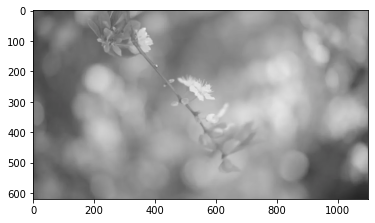

In [ ]:
img=cv.imread(path)
plt.imshow(img)
plt.show()


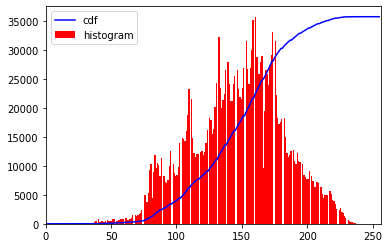

In [ ]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

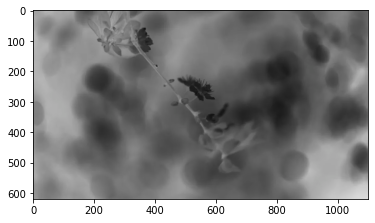

In [ ]:
inverted=255-img
plt.imshow(inverted) 
plt.show()


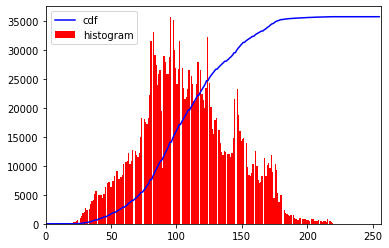

In [ ]:
hist,bins = np.histogram(inverted.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(inverted.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

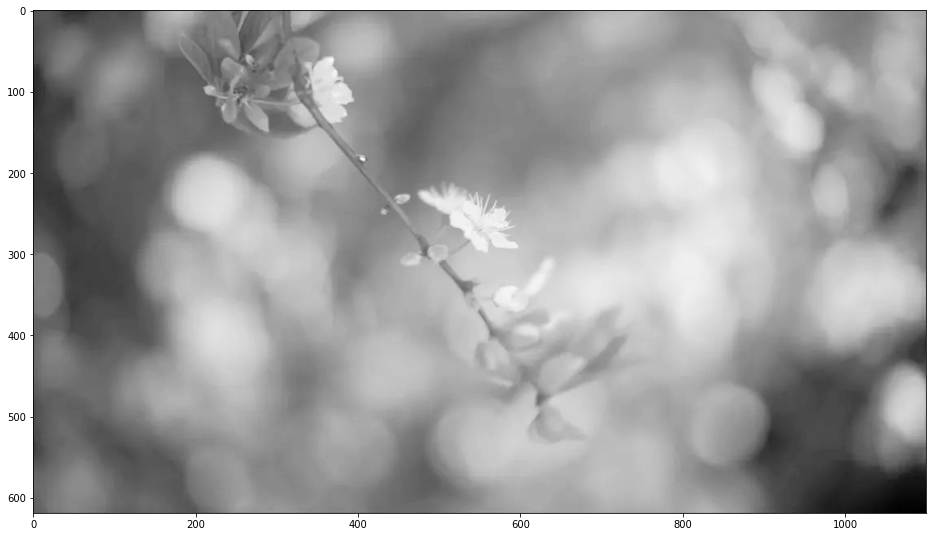

taille de l'image en nuance de gris : (619, 1100)


In [ ]:

img_grey = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.imshow(img_grey, cmap = 'Greys_r') # Greys_r: reversed Greys
plt.show()
print("taille de l'image en nuance de gris :", img_grey.shape)

In [ ]:
equ = cv.equalizeHist(img_grey)

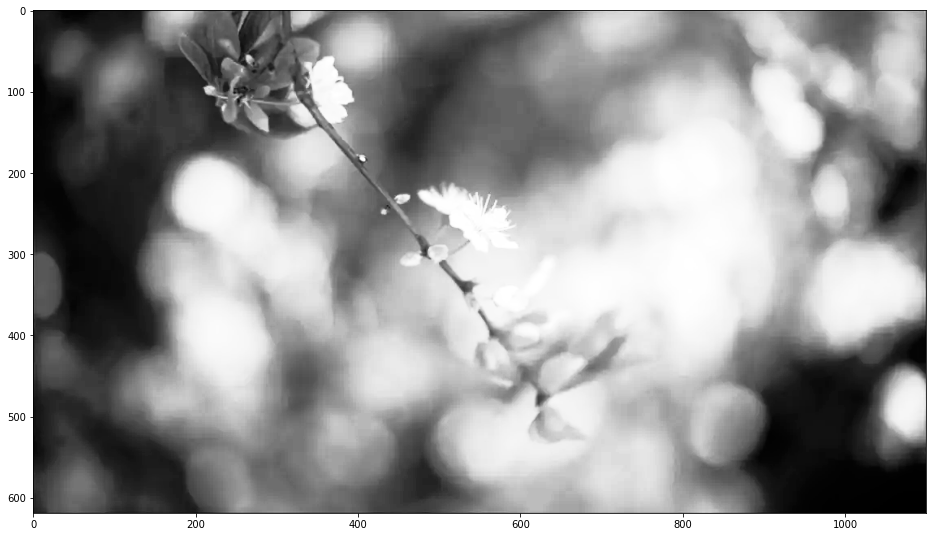

In [ ]:
plt.imshow(equ,cmap="Greys_r")
plt.show()

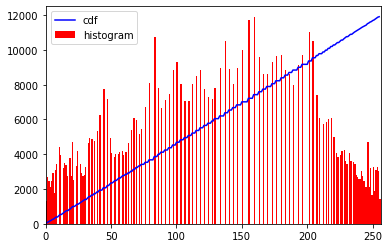

In [ ]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-
cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

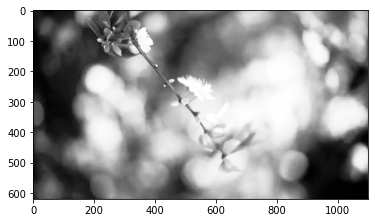

In [ ]:
img2 = cdf[img_grey]
plt.imshow(equ, cmap="Greys_r")
plt.show()



# **Adaptive Histogram Equalization (AHE)**

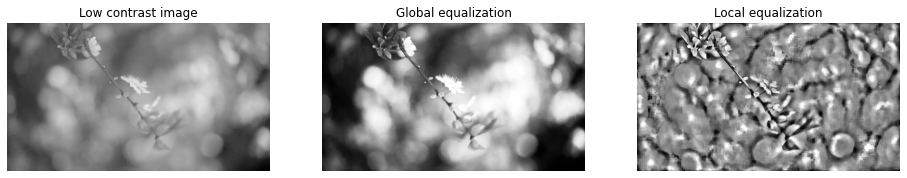

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte
from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank
from skimage.io import imsave, imread
# Original image
#img = img_as_ubyte(data.moon())
path = 'flower.png'
img = img_as_ubyte(imread(path, as_gray=True))

# Global equalize
img_global = exposure.equalize_hist(img)
# Local Equalization, disk shape kernel
# Better contrast with disk kernel but could be different
kernel = morp.disk(30)
img_local = rank.equalize(img, selem=kernel)
plt.rcParams['figure.figsize'] = [16, 16]
fig, (ax_img, ax_global, ax_local) = plt.subplots(1, 3)
ax_img.imshow(img, cmap=plt.cm.gray)
ax_img.set_title('Low contrast image')
ax_img.set_axis_off()
ax_global.imshow(img_global, cmap=plt.cm.gray)
ax_global.set_title('Global equalization')
ax_global.set_axis_off()
ax_local.imshow(img_local, cmap=plt.cm.gray)
ax_local.set_title('Local equalization')
ax_local.set_axis_off()
plt.show()

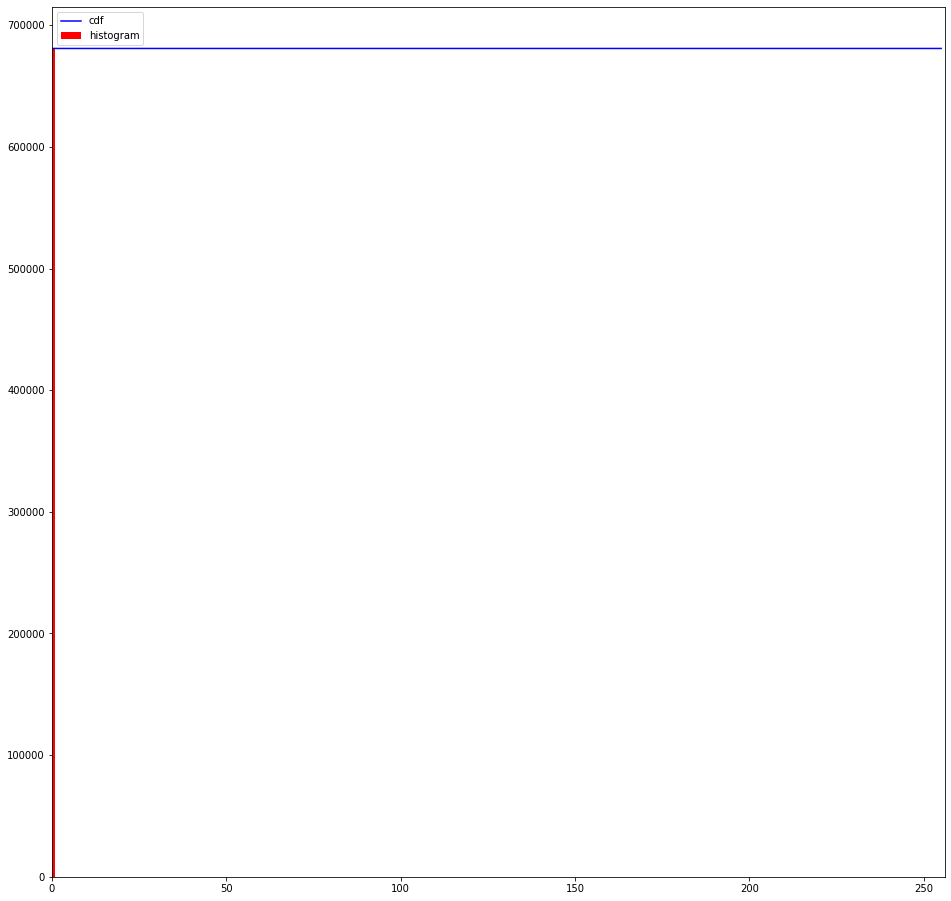

In [ ]:
hist,bins = np.histogram(img_global.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_global.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

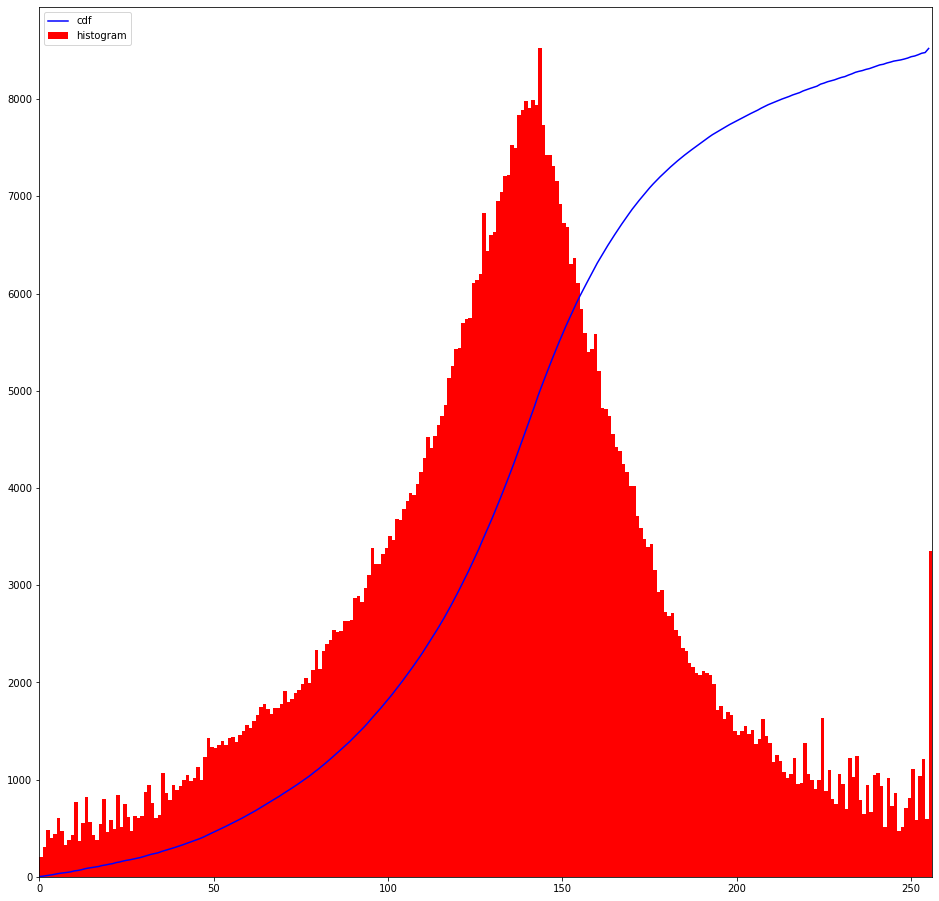

In [ ]:
hist,bins = np.histogram(img_local.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_local.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# **Contrastive Limited Adaptive Equalization**

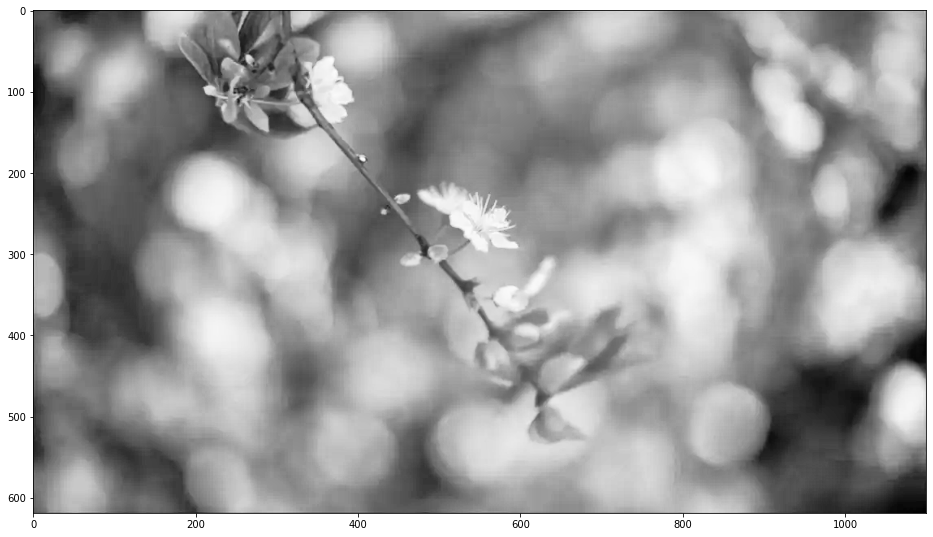

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#img = cv.imread('tsukuba_l.png',0)
path = "flower.png"
img = cv.imread(path)
grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(grayimg)
#cv.imwrite('clahe_2.jpg',cl1)
plt.imshow(cl1, cmap="Greys_r")
plt.show()